This notebook is used for Capstone Project

In [1]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [ ]:
!conda install -c conda-forge geopy --yes 
!conda install -c conda-forge folium=0.5.0 --yes

In [1]:
import requests 
import pandas as pd 
import numpy as np 
import random 

from geopy.geocoders import Nominatim 
from IPython.display import Image 
from IPython.core.display import HTML 
from sklearn.neighbors import KDTree    
from pandas.io.json import json_normalize
import folium 

CLIENT_ID = '0W1MHKERIP4CAUL5LAVS4XORC2C2D51SB2TGJAHZ44BVICVD' 
CLIENT_SECRET = 'E1HWUVNWVVP4DXCT02QTFF0YNNIAA1M2SWU3QR5JNC1JEOE1'
VERSION = '20180604'
LIMIT=50

In [74]:
address = input('please type in your address:').strip()

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)
search_query = input('What type of restaurant are you intereted in? :').strip()
radius =2000  #meters
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

please type in your address: 1200 Mission St, San Francisco


37.7724921 -122.4188648


What type of restaurant are you intereted in? : Japanese


Japanese .... OK!


'https://api.foursquare.com/v2/venues/search?client_id=0W1MHKERIP4CAUL5LAVS4XORC2C2D51SB2TGJAHZ44BVICVD&client_secret=E1HWUVNWVVP4DXCT02QTFF0YNNIAA1M2SWU3QR5JNC1JEOE1&ll=37.7724921,-122.4188648&v=20180604&query=Japanese&radius=2000&limit=50'

localize restaurants of interest near the desired location and create a dataframe of the search result

In [75]:
results = requests.get(url).json()
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

# Define information and filter the dataframe: keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dfc=dataframe_filtered[['name','categories','address','distance','lat','lng','id']]
dfc.head()

,name,categories,address,distance,lat,lng,id
0,Ryoko's Japanese Restaurant & Bar,Sushi Restaurant,619 Taylor St,1851,37.788183,-122.411882,433c8000f964a52043281fe3
1,Cha-Ya Vegetarian Japanese Restaurant,Vegetarian / Vegan Restaurant,762 Valencia St,1324,37.760786,-122.421557,44ccee85f964a52016361fe3
2,Muracci's Japanese Curry & Grill,Japanese Curry Restaurant,307 Kearny St,2427,37.791000,-122.404282,49ba1813f964a52059531fe3
3,Miyabi Japanese Restaurant,Sushi Restaurant,253 Church St,1085,37.766829,-122.428903,43a8315cf964a520742c1fe3
4,Japanese YWCA Building / Nihonmachi Little Fri...,Nursery School,1700 Sutter St,1918,37.787017,-122.430609,4d2ca3774ab78eec71103326


import csv form with SF health inspection restaurant_scores (file downloaded from Kaggle)

In [76]:
dfs=pd.read_csv('Restaurant_Scores_-_LIVES_Standard.csv')
dfs.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,835,Kam Po Kitchen,801 Broadway St,San Francisco,CA,94133,37.797223,-122.410513,"(37.797223, -122.410513)",NaN,835_20180917,09/17/2018 12:00:00 AM,88.0,Routine - Unscheduled,835_20180917_103154,Unclean or degraded floors walls or ceilings,Low Risk
1,67448,Soo Fong Restaurant,3801 03rd St 370,San Francisco,CA,94124,37.741829,-122.388098,"(37.741829, -122.388098)",NaN,67448_20180507,05/07/2018 12:00:00 AM,92.0,Routine - Unscheduled,67448_20180507_103149,Wiping cloths not clean or properly stored or ...,Low Risk
2,1757,Dar Bar Pakistani/Indian Cusine,1412 Polk St,San Francisco,CA,94109,37.789784,-122.420455,"(37.789784, -122.420455)",NaN,1757_20170928,09/28/2017 12:00:00 AM,86.0,Routine - Unscheduled,1757_20170928_103131,Moderate risk vermin infestation,Moderate Risk
3,93022,Wise Sons Delicatessen,537 Octavia St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,93022_20180907,09/07/2018 12:00:00 AM,92.0,Routine - Unscheduled,93022_20180907_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
4,4864,DRAGON CITY BAKERY & CAFE,2367 MISSION St,San Francisco,CA,94110,37.759174,-122.419066,"(37.759174, -122.419066)",1.415583e+10,4864_20161206,12/06/2016 12:00:00 AM,84.0,Routine - Unscheduled,4864_20161206_103157,Food safety certificate or food handler card n...,Low Risk


Each restaurant may have different scores from different inspections, here I'm getting the average score and group by the restaurant

In [77]:
dfs.rename(columns={'business_name': 'name', 'business_address': 'address'}, inplace=True)
dfsc=dfs[['name','inspection_score']]
dfscg=dfsc.groupby(dfs['name']).mean().round()

Join two forms together, toghether with ratings for each specific restaurant

In [78]:
dfj = pd.merge(dfc, dfscg, on='name', how='inner')

dfr=pd.DataFrame([])
for i,val in enumerate(dfj.name):
    target=val
    rownum=dataframe_filtered.index[dataframe_filtered.name==target].tolist()
    venue_id=dataframe_filtered.iloc[rownum[0],15]
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    result['response']['venue']
    dfr=dfr.append({'name':val, 'rating':result['response']['venue']['rating']},ignore_index=True)
dfj2 = pd.merge(dfj, dfr, on='name', how='inner')
dfj2

,name,categories,address,distance,lat,lng,id,inspection_score,rating
0,Japanese House,Japanese Restaurant,480 6th St,1457,37.776341,-122.403028,5a3adef8ca18ea1428d66942,82.0,5.5
1,An Japanese Restaurant,Sushi Restaurant,22 Peace Plz #510,1663,37.785029,-122.429155,563ba07ccd10e452f21ab439,98.0,7.9
2,Akira Japanese Restaurant,Restaurant,1634 Bush St,1813,37.788234,-122.424170,585cab80bbec66033bb4b92f,88.0,8.0
3,Rock Japanese Cuisine,Japanese Restaurant,Pine St,2415,37.791562,-122.405772,57a16052498ef2fd3cadd5a3,85.0,5.7
4,Niji Japanese Grille,Noodle House,50 Post St,2348,37.789393,-122.402882,4a0260bbf964a5204b711fe3,86.0,5.1


Input the SF crime data, get a vehicle crime count within 300 meters of the restaurant

In [79]:
dfcr=pd.read_csv('Police_Department_Incident_Reports__2018_to_Present.csv')
dfcr.head()
dfcr2=dfcr[['Incident ID','Incident Description','Analysis Neighborhood','Latitude','Longitude']]
dfcr2=dfcr2.rename(index=str, columns={"Incident Description": "Incident"}) 
dfcr2 = dfcr2.replace('', np.nan)
dfcr2 = dfcr2.dropna(axis=0)
dfcr2.shape
#dfv=dfcr2[dfcr2['Incident'].str.contains("Vehicle")]
dfv.shape
#getting restaurant and crime location, convert into numpy array
crime_l=dfcr2.values
dfj2_l=dfj2.values
crime_tree = KDTree(crime_l[:,[3,4]])
crimecount=crime_tree.query_radius(dfj2_l[:,[4,5]],r=0.003,count_only=True)
dfj2['Crime_Incidents'] = pd.Series(crimecount, index=dfj2.index)
dfj2

,name,categories,address,distance,lat,lng,id,inspection_score,rating,Crime_Incidents
0,Japanese House,Japanese Restaurant,480 6th St,1457,37.776341,-122.403028,5a3adef8ca18ea1428d66942,82.0,5.5,1634
1,An Japanese Restaurant,Sushi Restaurant,22 Peace Plz #510,1663,37.785029,-122.429155,563ba07ccd10e452f21ab439,98.0,7.9,1706
2,Akira Japanese Restaurant,Restaurant,1634 Bush St,1813,37.788234,-122.424170,585cab80bbec66033bb4b92f,88.0,8.0,1200
3,Rock Japanese Cuisine,Japanese Restaurant,Pine St,2415,37.791562,-122.405772,57a16052498ef2fd3cadd5a3,85.0,5.7,2388
4,Niji Japanese Grille,Noodle House,50 Post St,2348,37.789393,-122.402882,4a0260bbf964a5204b711fe3,86.0,5.1,2673


Next, explore parking options within 300 meters of the restaurant

In [80]:
#Locate the restaurant of choice
df_p=pd.DataFrame([])
result_array =np.array([ ])
for i,val in enumerate(dfj2.name):
    target=val  
    row2=dfj2.index[dfj2.name==target].tolist()
    venue_lat=dfj2.iloc[row2[0],4]
    venue_lng=dfj2.iloc[row2[0],5]

#find parking lot close to the restaurant and return results in result_array
    latitude = venue_lat
    longitude = venue_lng
    search_query = 'Parking'
    radius =300  #meters
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    result_array = np.append(result_array, [url], axis=0)

#clean the returned data and transform into dataframe
row_c=len(dfj2)
Parking_count =np.array([ ])
for i in range(row_c):
    results = requests.get(result_array[i]).json()
# assign relevant part of JSON to venues
    venues = results['response']['venues']

# tranform venues into a dataframe
    dataframe = json_normalize(venues)

# Define information and filter the dataframe: keep only columns that include venue name, and anything that is associated with location
    filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
    dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
    def get_category_type(row):
        try:
            categories_list = row['categories']
        except:
             categories_list = row['venue.categories']
        
        if len(categories_list) == 0:
             return None
        else:
             return categories_list[0]['name']

# filter the category for each row
    dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
    dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
    dfp=dataframe_filtered[['name','distance','lat','lng']]
    dfp=dfp.sort_values(by=['distance'])
    dfp.head()
     #pcount is the number of restaurant within 300 meters of the restaurant
    pcount=len(dfp)
    Parking_count = np.append(Parking_count, [pcount], axis=0)

#add the parking_count into the original dataframe
dfj2['Parking_Count'] = pd.Series(Parking_count, index=dfj2.index)
dfj2

,name,categories,address,distance,lat,lng,id,inspection_score,rating,Crime_Incidents,Parking_Count
0,Japanese House,Japanese Restaurant,480 6th St,1457,37.776341,-122.403028,5a3adef8ca18ea1428d66942,82.0,5.5,1634,9.0
1,An Japanese Restaurant,Sushi Restaurant,22 Peace Plz #510,1663,37.785029,-122.429155,563ba07ccd10e452f21ab439,98.0,7.9,1706,3.0
2,Akira Japanese Restaurant,Restaurant,1634 Bush St,1813,37.788234,-122.424170,585cab80bbec66033bb4b92f,88.0,8.0,1200,5.0
3,Rock Japanese Cuisine,Japanese Restaurant,Pine St,2415,37.791562,-122.405772,57a16052498ef2fd3cadd5a3,85.0,5.7,2388,21.0
4,Niji Japanese Grille,Noodle House,50 Post St,2348,37.789393,-122.402882,4a0260bbf964a5204b711fe3,86.0,5.1,2673,23.0


Create an algorithm to calculate a recommendation: 

In [81]:
#normalize all data to the max value of each column
dfj2.inspection_score =dfj2.inspection_score/dfj2.inspection_score.max()
dfj2.rating =dfj2.rating/dfj2.rating.max()
dfj2.Crime_Incidents =dfj2.Crime_Incidents/dfj2.Crime_Incidents.max()
dfj2.Parking_Count =dfj2.Parking_Count/dfj2.Parking_Count.max()
dfj2

,name,categories,address,distance,lat,lng,id,inspection_score,rating,Crime_Incidents,Parking_Count
0,Japanese House,Japanese Restaurant,480 6th St,1457,37.776341,-122.403028,5a3adef8ca18ea1428d66942,0.836735,0.6875,0.611298,0.391304
1,An Japanese Restaurant,Sushi Restaurant,22 Peace Plz #510,1663,37.785029,-122.429155,563ba07ccd10e452f21ab439,1.000000,0.9875,0.638234,0.130435
2,Akira Japanese Restaurant,Restaurant,1634 Bush St,1813,37.788234,-122.424170,585cab80bbec66033bb4b92f,0.897959,1.0000,0.448934,0.217391
3,Rock Japanese Cuisine,Japanese Restaurant,Pine St,2415,37.791562,-122.405772,57a16052498ef2fd3cadd5a3,0.867347,0.7125,0.893378,0.913043
4,Niji Japanese Grille,Noodle House,50 Post St,2348,37.789393,-122.402882,4a0260bbf964a5204b711fe3,0.877551,0.6375,1.000000,1.000000


This is an example of calculation algorithm. In the real world, how people value each specific components should be assayed by questionnaires.

In [82]:
rs=(0.2*dfj2.inspection_score+0.55*dfj2.rating+0.15*dfj2.Parking_Count+0.1*1/dfj2.Crime_Incidents)*100
rsarray = np.asarray(rs.round())

df_final=dfj2[['name','lat','lng']]
df_final['Recommendation_Score'] = pd.Series(rsarray, index=df_final.index)
df_final.set_index('name', inplace=True)
df_final

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,lat,lng,Recommendation_Score
name,,,
Japanese House,37.776341,-122.403028,77.0
An Japanese Restaurant,37.785029,-122.429155,92.0
Akira Japanese Restaurant,37.788234,-122.424170,98.0
Rock Japanese Cuisine,37.791562,-122.405772,81.0
Niji Japanese Grille,37.789393,-122.402882,78.0


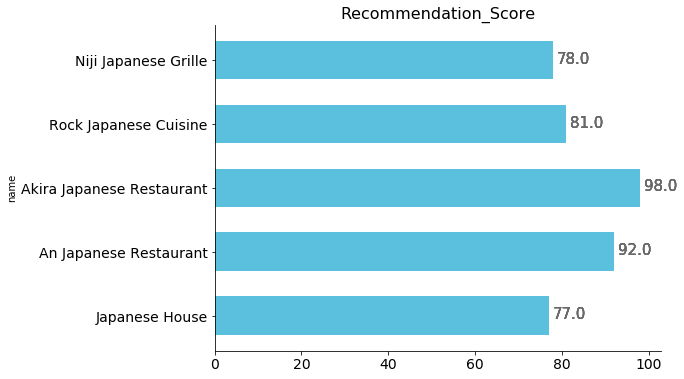

In [83]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
#create a bar graph for each Recommendation_Score
dfb=df_final.Recommendation_Score
ax=dfb.plot(kind='barh',
        figsize=(8,6), 
         width=0.6,
         color=['#5bc0de'],
         fontsize=14)
         
for i, label in enumerate(list(dfb.index)):
    for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+.9, i.get_y()+.25, \
            str(round((i.get_width()), 2)), fontsize=15, color='dimgrey')


ax.set_title('Recommendation_Score',fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)

plt.show()

create a parking lot map for selected restaurant

In [88]:
#create a Map
parking_map = folium.Map(location=[latitude, longitude], zoom_start=16) 

target=input('Please enter restaurant name:')  
row2=dfj2.index[dfj2.name==target].tolist()
venue_lat=dfj2.iloc[row2[0],4]
venue_lng=dfj2.iloc[row2[0],5]

#find parking lot close to the restaurant
latitude = venue_lat
longitude = venue_lng
print(latitude, longitude)


Please enter restaurant name: Akira Japanese Restaurant


37.7882336424293 -122.42417020324828


In [89]:
search_query = 'Parking'
radius =300  #meters
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
print(url)


Parking .... OK!
https://api.foursquare.com/v2/venues/search?client_id=0W1MHKERIP4CAUL5LAVS4XORC2C2D51SB2TGJAHZ44BVICVD&client_secret=E1HWUVNWVVP4DXCT02QTFF0YNNIAA1M2SWU3QR5JNC1JEOE1&ll=37.7882336424293,-122.42417020324828&v=20180604&query=Parking&radius=300&limit=50


In [90]:
results = requests.get(url).json()
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

# Define information and filter the dataframe: keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dfp=dataframe_filtered[['name','address','distance','lat','lng']]

# add a red circle marker to represent the current location
folium.features.CircleMarker(
    [latitude, longitude],
    radius=8,
    color='red',
    popup=target,
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(parking_map)

for lat, lng, name in zip(dfp.lat, dfp.lng, dfp.name):
    popup=folium.Popup(name,parse_html=True)
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=popup,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(parking_map)

parking_map